In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv('insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.duplicated().any()

True

In [6]:
insurance.duplicated().sum()

1

In [7]:
insurance.drop_duplicates(inplace = True)

In [8]:
insurance.duplicated().any()

False

<Axes: >

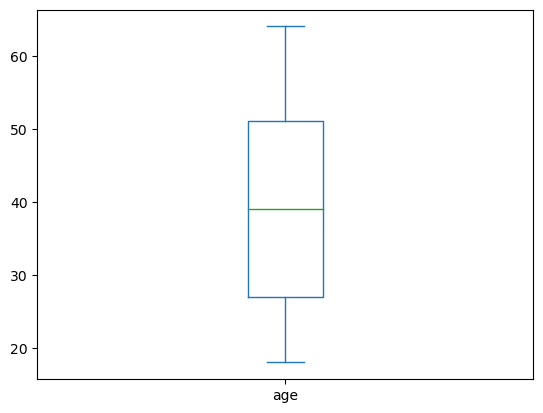

In [9]:
# univariate analysis
insurance['age'].plot(kind='box')

<Axes: xlabel='age'>

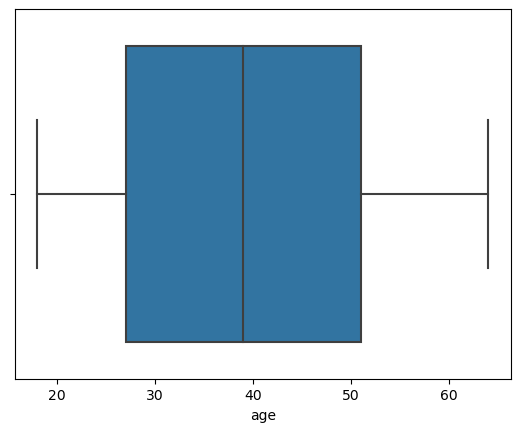

In [10]:
sns.boxplot(x= insurance['age'])

<Axes: xlabel='bmi'>

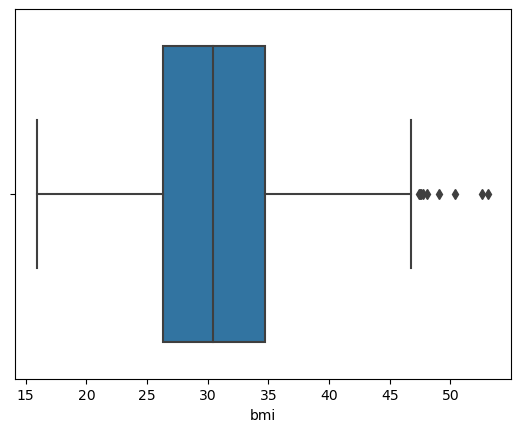

In [11]:
# bmi
sns.boxplot(x= insurance['bmi'])

<Axes: xlabel='charges'>

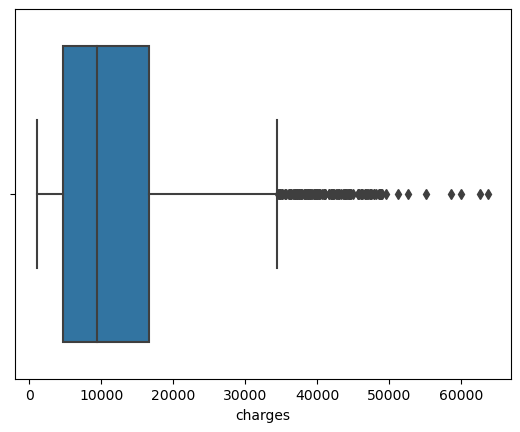

In [12]:
# charges
sns.boxplot(x= insurance['charges'])

In [13]:
# sex
insurance['sex'].unique()

array(['female', 'male'], dtype=object)

In [14]:
# children
insurance['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [15]:
# smoker
insurance['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [16]:
# region
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
insurance['sex'] = insurance['sex'].map({'female':0, 'male':1})

In [18]:
insurance['smoker'] = insurance['smoker'].map({'yes':1, 'no':0})

In [19]:
insurance['region'] = insurance['region'].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})

In [20]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [21]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


In [22]:
# independent matrix, dependant vector
X = insurance.drop(columns='charges')
y = insurance['charges']  # target on lowercase
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train

,age,sex,bmi,children,smoker,region
1114,23,1,24.510,0,0,3
968,21,1,25.745,2,0,3
599,52,0,37.525,2,0,2
170,63,1,41.470,0,0,1
275,47,0,26.600,2,0,3
...,...,...,...,...,...,...
1096,51,0,34.960,2,1,3
1131,27,1,45.900,2,0,0
1295,20,1,22.000,1,0,0
861,38,0,28.000,3,0,0


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
# creating object fo] r algo\
lr = LinearRegression()
svr = SVR()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

# train/fit data 

In [28]:
lr.fit(X_train, y_train)
svr.fit(X_train, y_train)
rfr.fit(X_train, y_train)
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

# predict test data


In [29]:
lr_predict = lr.predict(X_test)
svr_predict = svr.predict(X_test)
rfr_predict = rfr.predict(X_test)
gbr_predict = gbr.predict(X_test)

In [30]:
df = pd.DataFrame({'Actual':y_test, 'LR':lr_predict, 'SVR':svr_predict, 'RFR':rfr_predict, 'GBR': gbr_predict})

In [31]:
df.head()

,Actual,LR,SVR,RFR,GBR
900,8688.85885,8080.450186,9285.139795,10759.910769,10503.526620
1064,5708.86700,5592.871120,9161.150970,5904.074328,7231.162694
1256,11436.73815,14378.298655,9303.979540,12016.348507,13518.524149
298,38746.35510,31731.819541,9174.366057,43451.415772,38985.408853
237,4463.20510,9158.356944,9177.179203,6257.334335,6291.919618


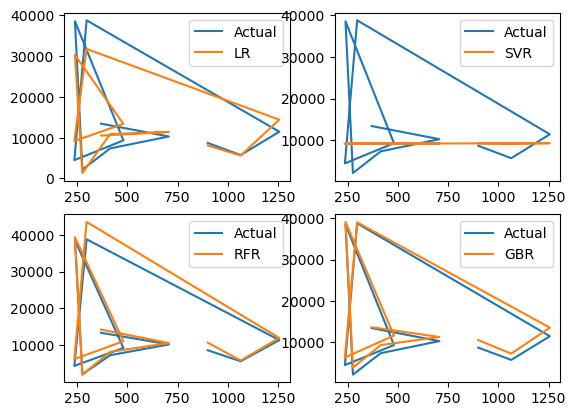

In [32]:
plt.figure
plt.subplot(221)
plt.plot(df['Actual'].iloc[:11], label = 'Actual')
plt.plot(df['LR'].iloc[:11], label = 'LR')
plt.legend()


plt.subplot(222)
plt.plot(df['Actual'].iloc[:11], label = 'Actual')
plt.plot(df['SVR'].iloc[:11], label = 'SVR')
plt.legend()

plt.subplot(223)
plt.plot(df['Actual'].iloc[:11], label = 'Actual')
plt.plot(df['RFR'].iloc[:11], label = 'RFR')
plt.legend()

plt.subplot(224)
plt.plot(df['Actual'].iloc[:11], label = 'Actual')
plt.plot(df['GBR'].iloc[:11], label = 'GBR')
plt.legend()

plt.show()

# evaluation algorithms

In [33]:
from sklearn import metrics

### coeff of determinant / goodness of fit

In [34]:
lr_score = metrics.r2_score(y_test, lr_predict)
svr_score = metrics.r2_score(y_test, svr_predict)
rfr_score = metrics.r2_score(y_test, rfr_predict)
gbr_score = metrics.r2_score(y_test, gbr_predict)

In [35]:
print(lr_score, svr_score, rfr_score, gbr_score)

0.8068466322629111 -0.1344462622675453 0.8780573775382137 0.900781216055087


### Mean Absolute Error 

In [36]:
lr_mae = metrics.mean_absolute_error(y_test, lr_predict)
svr_mae = metrics.mean_absolute_error(y_test, svr_predict)
rfr_mae = metrics.mean_absolute_error(y_test, rfr_predict)
gbr_mae = metrics.mean_absolute_error(y_test, gbr_predict)

In [37]:
print(lr_mae, svr_mae, rfr_mae, gbr_mae)

4182.3531552883 9249.886802156661 2616.9722148238807 2518.5658937145768


### mean squared error

In [38]:
lr_mse = metrics.mean_squared_error(y_test, lr_predict)
svr_mse = metrics.mean_squared_error(y_test, svr_predict)
rfr_mse = metrics.mean_squared_error(y_test, rfr_predict)
gbr_mse = metrics.mean_squared_error(y_test, gbr_predict)

In [39]:
print(lr_mse, svr_mse, rfr_mse, gbr_mse)

35493102.61165054 208461380.02042088 22407696.342427604 18232053.216661427


## prepare new customer

In [40]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [41]:
data = {
    'age':40 , 
    'sex':0 , 
    'bmi':27 , 
    'children': 2, 
    'smoker':0 , 
    'region':2 
}

new_df = pd.DataFrame(data, index = [0])
new_df

,age,sex,bmi,children,smoker,region
0,40,0,27,2,0,2


In [42]:
gbr.predict(new_df)

array([8348.37085352])

# Save the model using Joblib

In [43]:
import joblib

In [44]:
gbr = GradientBoostingRegressor()
gbr.fit(X, y) # 100% data

GradientBoostingRegressor()

In [45]:
joblib.dump(gbr, 'model_joblib_gbr') # creating path

['model_joblib_gbr']

In [46]:
model = joblib.load('model_joblib_gbr') # path lai model maa convert

In [47]:
model.predict(new_df)

array([8486.8588821])

In [50]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [48]:
lr.coef_

array([  248.76407134,   -99.69539417,   312.60904469,   534.12087654,
       23052.15275173,   237.62514748])

In [49]:
lr.intercept_

-11760.561999173467